In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

from sklearn import metrics
import time
import json
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('Supermarket Data.csv')
data.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,UM,YF,9.941080e+14,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,MM,OF,9.941080e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,MM,YF,9.941090e+14,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,LA,OF,9.941080e+14,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,NaN,NaN,9.941080e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

In [5]:
data.isnull().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                   153682
CUST_PRICE_SENSITIVITY      153682
CUST_LIFESTAGE              259315
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [6]:
data2 = data.dropna(thresh=1, subset=['CUST_CODE'])

In [7]:
data2.isnull().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                        0
CUST_PRICE_SENSITIVITY           0
CUST_LIFESTAGE              105633
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802892 entries, 0 to 956572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 802892 non-null  int64  
 1   SHOP_DATE                 802892 non-null  int64  
 2   SHOP_WEEKDAY              802892 non-null  int64  
 3   SHOP_HOUR                 802892 non-null  int64  
 4   QUANTITY                  802892 non-null  int64  
 5   SPEND                     802892 non-null  float64
 6   PROD_CODE                 802892 non-null  object 
 7   PROD_CODE_10              802892 non-null  object 
 8   PROD_CODE_20              802892 non-null  object 
 9   PROD_CODE_30              802892 non-null  object 
 10  PROD_CODE_40              802892 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

In [15]:
X = data2.iloc[:, [0, 1, 2, 3, 4, 5]].values

In [16]:
X

array([[2.0073200e+05, 2.0071005e+07, 6.0000000e+00, 1.7000000e+01,
        3.0000000e+00, 6.7500000e+00],
       [2.0073300e+05, 2.0071010e+07, 4.0000000e+00, 2.0000000e+01,
        3.0000000e+00, 6.7500000e+00],
       [2.0074100e+05, 2.0071209e+07, 1.0000000e+00, 1.1000000e+01,
        1.0000000e+00, 2.2500000e+00],
       ...,
       [2.0061800e+05, 2.0060701e+07, 7.0000000e+00, 1.2000000e+01,
        3.0000000e+00, 3.9600000e+00],
       [2.0061700e+05, 2.0060622e+07, 5.0000000e+00, 1.8000000e+01,
        3.0000000e+00, 3.9600000e+00],
       [2.0061900e+05, 2.0060706e+07, 5.0000000e+00, 1.9000000e+01,
        3.0000000e+00, 3.9600000e+00]])

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

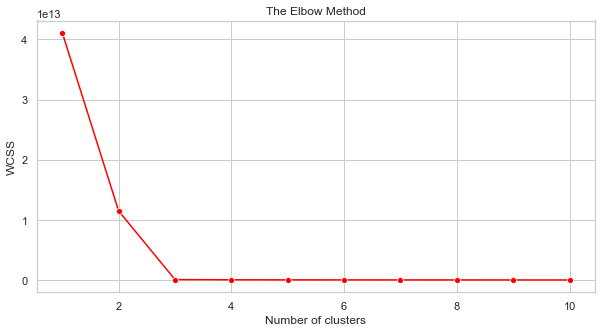

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()